# Data Challenge 1 

## Predict whether a cell is malignant or benign

### By Tak Koyanagi

<H1>Summary</H1>

Cancer mortality is one of the leading cause of death worldwide. The World Health Organization has estimated 9.6 million deaths world wide in 2018. Early detection of cancer has been found to decrease mortality. Physicians have relied on detecting malignant tumors by examining features of tumors such as clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli, and  mitoses. However, manually examining and deciphering whether a tumor is malignant is robs time of doctors. By employing machine learning, malignant tumors can be detected without the need of physically examining the data. Using logistic regression, malignant tumors can be correctly identified with an F1 score of [96%](#F1). A quick prompt form was created to determine if a tumor is cancerous by filling in the form and returning the results in real time.

<H1>Methods</H1>

Methods: 
EDA: remove duplicated entries that began with 15189 entires to 666. entries with no values, but only strings and punctuations were removed. Entries with only one missing values on the other hand, were imputed using [K nearest neighbors](#KNN). Lastly, anomolous values greater than 10 were normalized to be between 1 to 10.  

[Machine learning](#F1): Several machine learning models were test such as Logistic regression with cross validation, SVM, random forest, and gradient boost trees were examined and compared using the F1 score. The reason the F1 score was used over other metrics was because detecting both false positive and false negative results would be crucial for this situation. Specifically, we want to detect all cancers to treat, however, we do not want to impose cancer therapy on healthy patients.

<H1>Results</H1>

The features of the a cell that are the largest drivers of malignancy are clump thickness, uniformity of cell shape, marginal adhesion, bare nuclei, bland chromatin, normal nucleoli, and mitoses.

Collecting features cost time and money, uniformity of cell size and single epithelial cell size do not contribute to the accuracy of machine learning model in predicting whether a cell is malignant.

A simple prompt [questionaire](#app) was created to deliver inference on whether a tumor is cancerous using clump thickness, uniformity of cell shape, marginal adhesion, bare nuclei, bland chromatin, normal nucleoli, and  mitoses in realtime should save time and money for doctors to correctly diagnose whether a cell is malignant by F1 score of 96%. [Other machine learning algorithms](#moreML) were examined, however, F1 values did not improve with a more complicated model.

<H1>EDA</H1>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.txt')

# check to make sure there are no duplicates
df[df['ID'].duplicated()].sort_values('ID')

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
15090,15090,320675,3,3,5,2,3,10,7,1,1,4
12173,12173,378275,10,9,7,3,4,2,7,7,1,4
6378,6378,378275,10,9,7,3,4,2,7,7,1,4
8808,8808,378275,10,9,7,3,4,2,7,7,1,4
12168,12168,378275,10,9,7,3,4,2,7,7,1,4
12158,12158,378275,10,9,7,3,4,2,7,7,1,4
2916,2916,378275,10,9,7,3,4,2,7,7,1,4
14548,14548,378275,10,9,7,3,4,2,7,7,1,4
5459,5459,378275,10,9,7,3,4,2,7,7,1,4
12136,12136,378275,10,9,7,3,4,2,7,7,1,4


In [3]:
# remove duplicated entries
df_nodup = df[df.ID.duplicated()].index
df_nodup = df.drop(df_nodup)
df_nodup

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4
5,5,601265,10,4,4,6,2,10,2,3,1,4
6,6,378275,10,9,7,3,4,2,7,7,1,4
10,10,1169049,7,3,4,4,3,3,3,2,7,4
12,12,1111249,10,6,6,3,4,5,3,6,1,4
13,13,1076352,3,6,4,10,3,3,3,4,1,4


In [149]:
df_nodup.columns

Index(['id', 'clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [4]:
# clean column names
df_nodup.columns = [c.lower().replace(" ", "_") for c in df_nodup.columns]
df_nodup.head()

,index,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4


In [5]:
# set index as dataframe index
df_nodup.set_index('index', inplace=True)
df_nodup.head()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4


In [6]:
# check null values
df_nodup.isnull().sum()

id                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [7]:
#remove entries that are 'No idea'
df_dropNoIdea = df_nodup[df_nodup['uniformity_of_cell_size'] == 'No idea'].index
df_dropNoIdea = df_nodup.drop(df_dropNoIdea)
df_dropNoIdea.head(40)

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4
5,601265,10,4,4,6,2,10,2,3,1,4
6,378275,10,9,7,3,4,2,7,7,1,4
10,1169049,7,3,4,4,3,3,3,2,7,4
12,1111249,10,6,6,3,4,5,3,6,1,4


In [8]:
# hashes found in item 394
df_dropNoIdea = df_dropNoIdea.replace('?', np.nan)
df_dropNoIdea = df_dropNoIdea.replace('', np.nan)
df_dropNoIdea = df_dropNoIdea.replace(' ', np.nan)
df_dropNoIdea[df_dropNoIdea.bare_nuclei.isna()]

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
index,,,,,,,,,,,
157,1057067,1,1,1,1,1,NaN,1,1,1,2
1144,1238464,1,1,1,1,1,NaN,2,1,1,2
1799,169356,3,1,1,1,2,NaN,3,1,1,2
2398,563649,8,8,8,1,2,NaN,6,10,1,4
3727,61634,5,4,3,1,2,NaN,2,3,1,2
5059,1096800,6,6,6,9,6,NaN,7,8,1,2
6013,1258549,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6563,1241232,3,1,4,1,2,NaN,3,1,1,2
6752,1193683,1,1,2,1,3,NaN,1,1,1,2


In [9]:
df_dropNoIdea.isna().sum()

id                              0
clump_thickness                 0
uniformity_of_cell_size         1
uniformity_of_cell_shape        1
marginal_adhesion               1
single_epithelial_cell_size     1
bare_nuclei                    17
bland_chromatin                 1
normal_nucleoli                 1
mitoses                         1
class                           1
dtype: int64

In [10]:
# remove id 1258549
d_index = df_dropNoIdea[df_dropNoIdea.id == 1258549].index
df_dropNoIdea = df_dropNoIdea.drop(d_index)

In [11]:
df_null = df_dropNoIdea[df_dropNoIdea.bare_nuclei.isna()].sort_values('class')
df_null

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
index,,,,,,,,,,,
157,1057067,1,1,1,1,1,NaN,1,1,1,2
1144,1238464,1,1,1,1,1,NaN,2,1,1,2
1799,169356,3,1,1,1,2,NaN,3,1,1,2
3727,61634,5,4,3,1,2,NaN,2,3,1,2
5059,1096800,6,6,6,9,6,NaN,7,8,1,2
6563,1241232,3,1,4,1,2,NaN,3,1,1,2
6752,1193683,1,1,2,1,3,NaN,1,1,1,2
7122,432809,3,1,3,1,2,NaN,2,1,1,2
7539,1184840,1,1,3,1,2,NaN,2,1,1,2


In [12]:
df_not_null = df_dropNoIdea[~df_dropNoIdea.bare_nuclei.isna()]

<H1>KNN impute Nan</H1><a id='KNN'></a>

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
column_names = df_not_null.columns.tolist()
column_names_y = column_names.pop(6)
column_names

['id',
 'clump_thickness',
 'uniformity_of_cell_size',
 'uniformity_of_cell_shape',
 'marginal_adhesion',
 'single_epithelial_cell_size',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses',
 'class']

In [15]:
column_names_y

'bare_nuclei'

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_not_null[column_names], df_not_null[column_names_y], test_size=0.30, random_state=66)

In [17]:
error = []
K = range(1,15)

for k in K:
    clf = KNeighborsClassifier(k, weights='distance')
    trained_model = clf.fit(X_train, y_train)
    pred_k = trained_model.predict(X_test)
    error.append(np.mean(pred_k != y_test))

Text(0, 0.5, 'Mean Error')

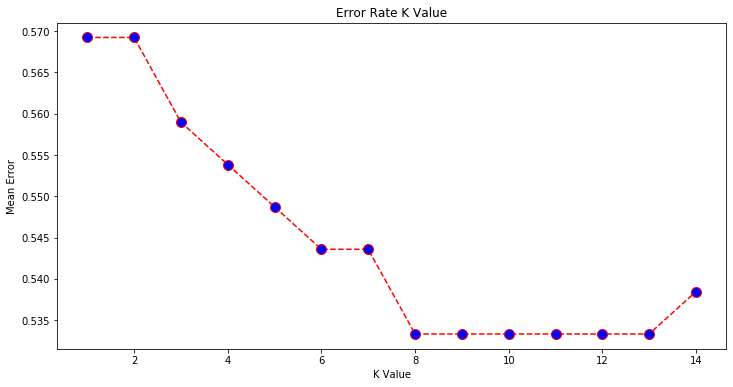

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [19]:
# impute KNN for missing values
clf = KNeighborsClassifier(8, weights='distance')
trained_model = clf.fit(df_not_null[column_names], df_not_null[column_names_y])
pred_k = trained_model.predict(df_null[column_names])
df_null['bare_nuclei'] = pred_k
df_null

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
index,,,,,,,,,,,
157,1057067,1,1,1,1,1,1,1,1,1,2
1144,1238464,1,1,1,1,1,1,2,1,1,2
1799,169356,3,1,1,1,2,1,3,1,1,2
3727,61634,5,4,3,1,2,10,2,3,1,2
5059,1096800,6,6,6,9,6,2,7,8,1,2
6563,1241232,3,1,4,1,2,5,3,1,1,2
6752,1193683,1,1,2,1,3,10,1,1,1,2
7122,432809,3,1,3,1,2,1,2,1,1,2
7539,1184840,1,1,3,1,2,1,2,1,1,2


In [20]:
df_dropNoIdea = df_not_null.append(df_null)
df_dropNoIdea.isnull().sum()

id                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [21]:
np.max(df_dropNoIdea['class'])

'40'

In [22]:
# Convert values to numeric
df_dropNoIdea = df_dropNoIdea.apply(pd.to_numeric)

In [23]:
df_dropNoIdea.dtypes

id                             int64
clump_thickness                int64
uniformity_of_cell_size        int64
uniformity_of_cell_shape       int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
class                          int64
dtype: object

In [24]:
# len(df_dropNoIdea.columns)
vec = [1,10,10,10,10,10,10,10,10,10,10]
len(vec)

11

In [25]:
df_dropNoIdea[df_dropNoIdea['class'] > 4]

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
index,,,,,,,,,,,
167,12266120,70,50,60,30,30,80,70,40,10,40
213,11122090,80,100,100,10,30,60,30,90,10,40
243,11690490,70,30,40,40,30,30,30,20,70,40
374,11986410,100,100,60,30,30,100,40,30,20,40
1191,12410350,70,80,30,70,40,50,70,80,20,40
1222,6012650,100,40,40,60,20,100,20,30,10,40
1888,12008920,80,60,50,40,30,100,60,10,10,40
2053,11112490,100,60,60,30,40,50,30,60,10,40
2183,11427060,50,100,100,100,60,100,60,50,20,40


In [26]:
ten_list = df_dropNoIdea[df_dropNoIdea['class'] > 4].index

In [27]:
# Normalize data that is scaled by 10
df_dropNoIdea.loc[ten_list] = df_dropNoIdea.loc[ten_list]/vec
df_dropNoIdea.loc[ten_list].astype(int)

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
index,,,,,,,,,,,
167,12266120,7,5,6,3,3,8,7,4,1,4
213,11122090,8,10,10,1,3,6,3,9,1,4
243,11690490,7,3,4,4,3,3,3,2,7,4
374,11986410,10,10,6,3,3,10,4,3,2,4
1191,12410350,7,8,3,7,4,5,7,8,2,4
1222,6012650,10,4,4,6,2,10,2,3,1,4
1888,12008920,8,6,5,4,3,10,6,1,1,4
2053,11112490,10,6,6,3,4,5,3,6,1,4
2183,11427060,5,10,10,10,6,10,6,5,2,4


In [33]:
df_dropNoIdea['class'] = df_dropNoIdea['class'].astype(int)

In [34]:
# Convert labels to dumy variables 1 for malignant and 0 for benign
df = df_dropNoIdea.copy()
label_dummies = pd.get_dummies(df['class'])
df['class'] = label_dummies[4.0]
df = df[df.columns[1:]]

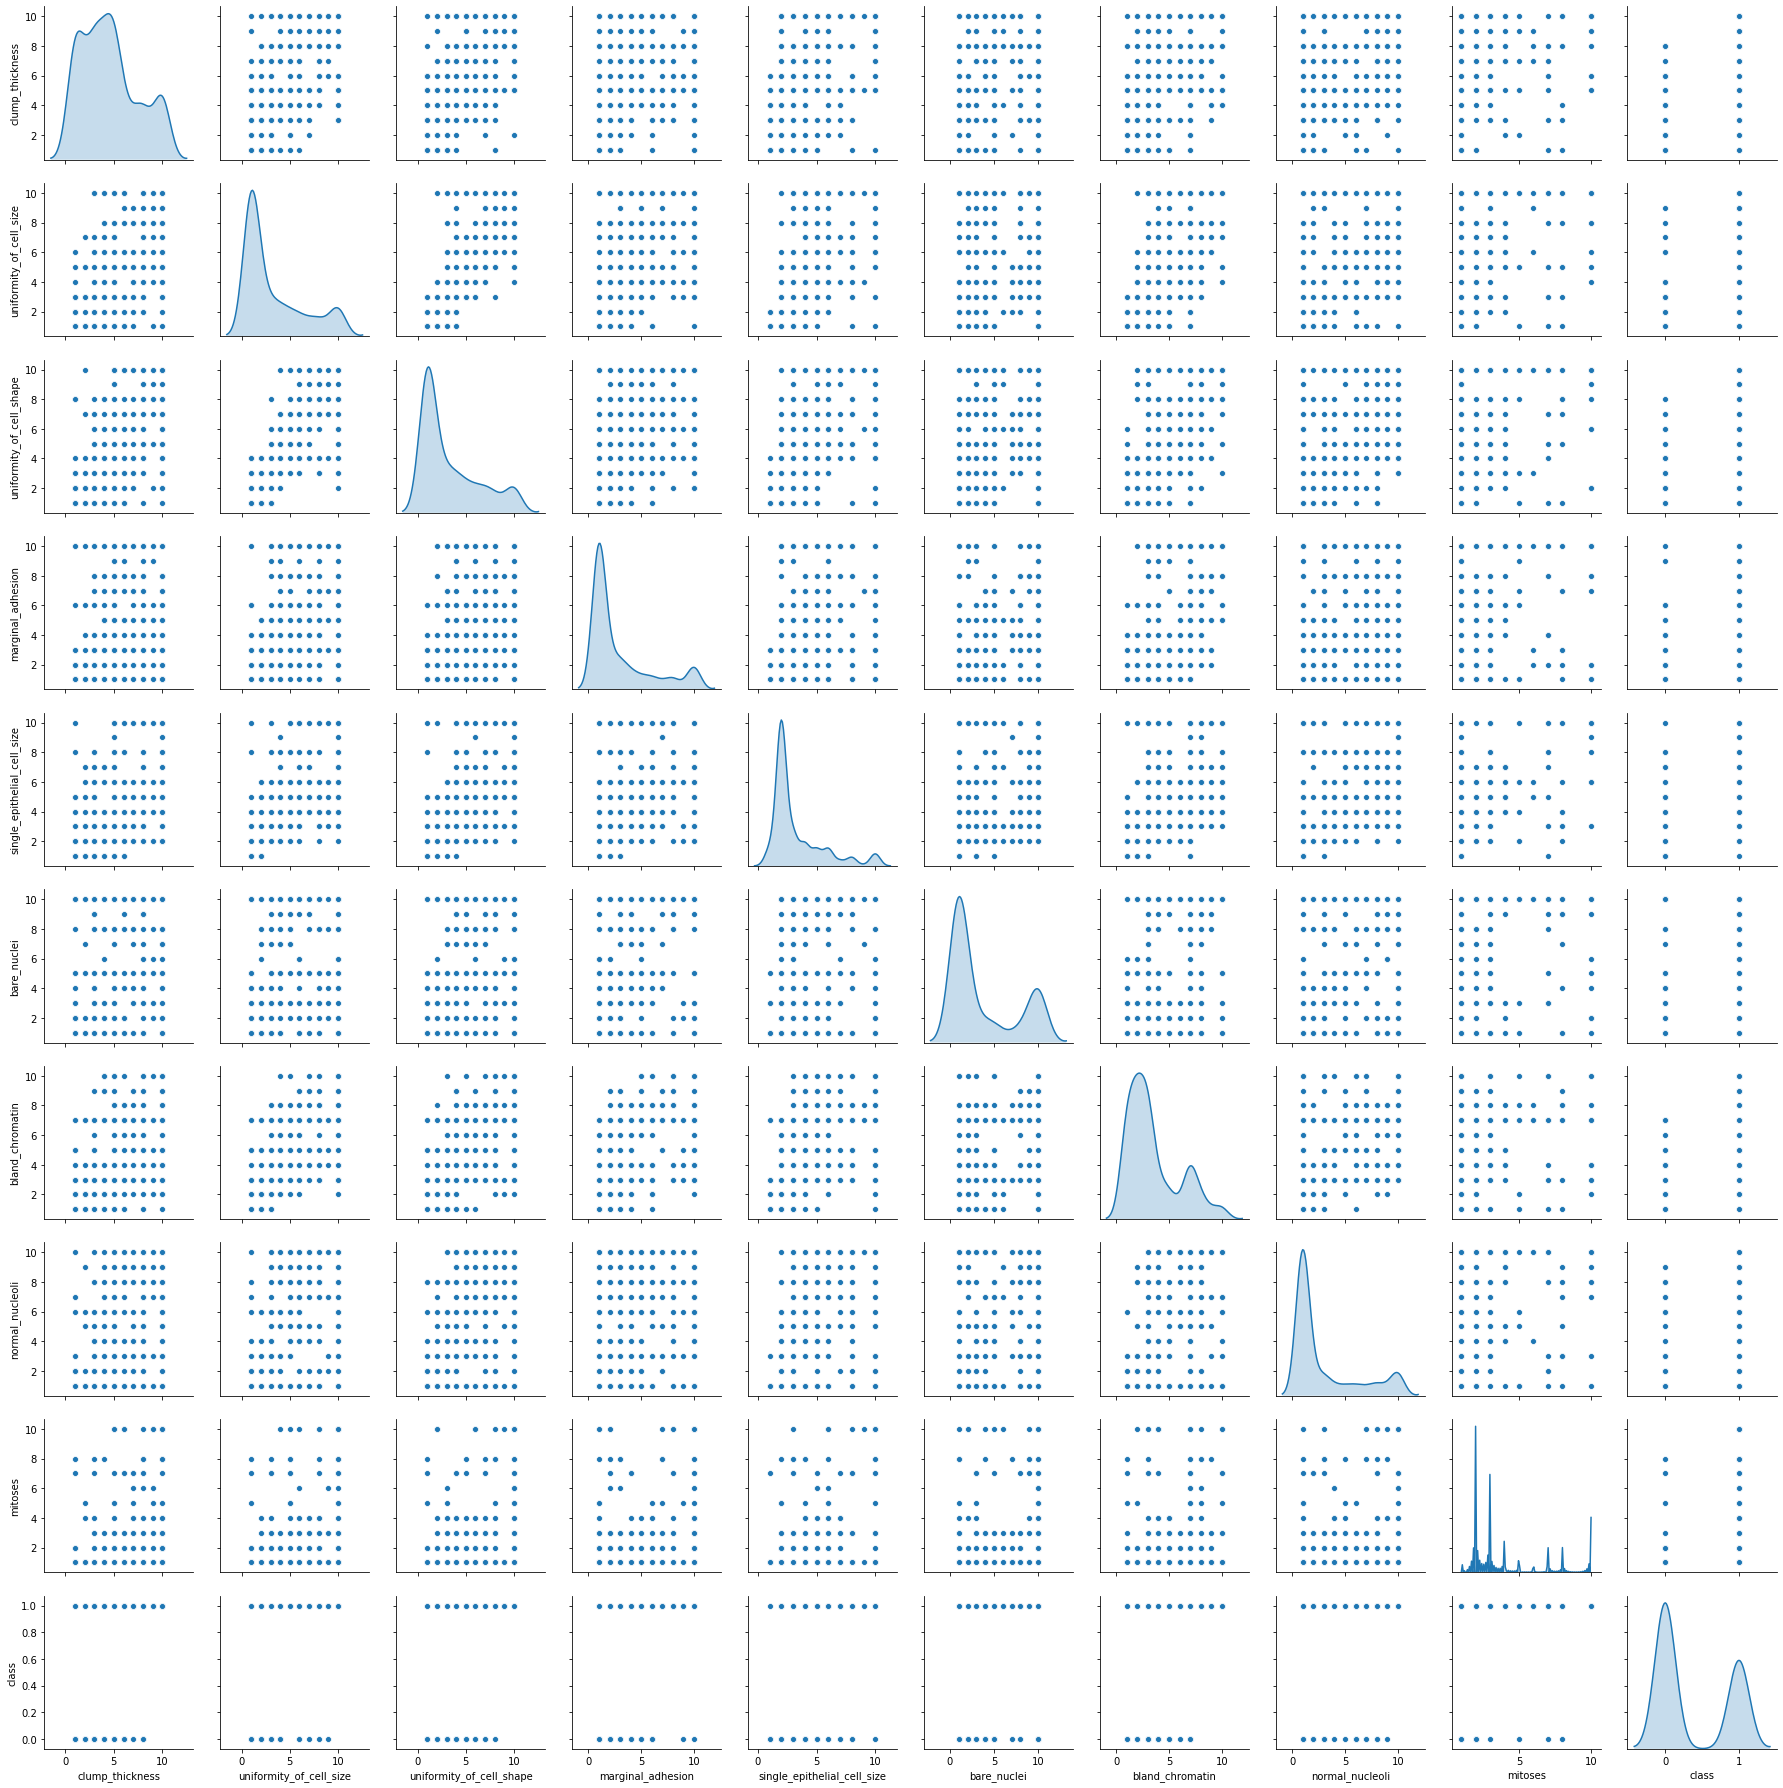

In [35]:
# Overview of data
sns.pairplot(df, diag_kind='kde')

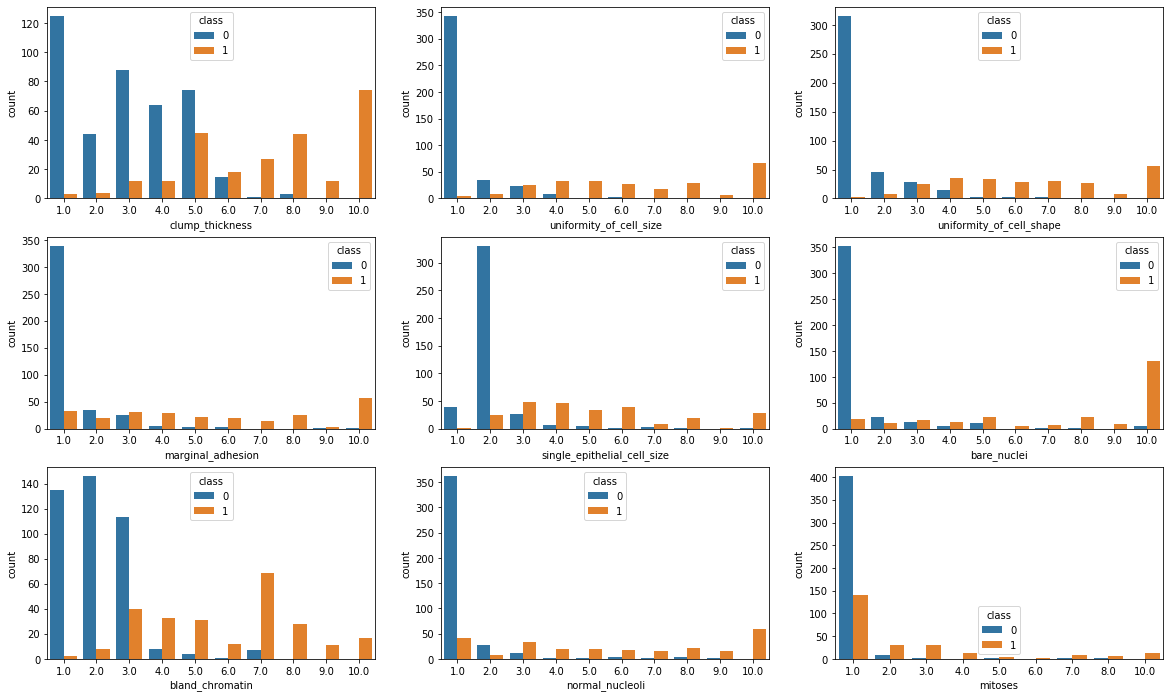

In [31]:
# Loop through data to determine if any features strongly influence prediction
fig, ax = plt.subplots(3,3, figsize=(20,12))
count = 0
for i in range(3):
    for j in range(3):
        sns.countplot(df[df.columns[count]], hue=df['class'], ax=ax[i,j])
        count += 1
plt.show()

<H1>Machine Learning</H1><a id='F1'></a>

In [46]:
# logistic regression
X_train, X_test, y_train, y_test = train_test_split(
    df[df.columns[:-1]], df[df.columns[-1]], test_size=0.30, random_state=66)

In [64]:
from sklearn.linear_model import LogisticRegressionCV
clf_bal = LogisticRegressionCV(cv=5, random_state=66, class_weight='balanced',
                          multi_class='multinomial').fit(X_train,y_train)

In [60]:
pred = clf.predict_proba(X_test)

In [65]:
clf_bal.score(X_test,y_test)

0.96

In [71]:
# leave as balanced
clf_no_multinom = LogisticRegressionCV(cv=5, random_state=66,
                          ).fit(X_train,y_train)
clf_no_multinom.score(X_test,y_test)

0.965

In [253]:
# leave as unbalanced{#F1}
clf = LogisticRegressionCV(cv=5, random_state=66,
                          multi_class='multinomial').fit(X_train,y_train)
# clf.score(X_test,y_test)
log_pred = clf.predict(X_test)
fpr_lg, tpr_lg, _ = roc_curve(y_test, log_pred)
f1_score(y_test, log_pred)
# roc_auc_score(y_test, log_pred)

0.9565217391304347

In [120]:
clf.densify()

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=66, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [70]:
clf.scores_

{1: array([[0.92553191, 0.94680851, 0.94680851, 0.93617021, 0.93617021,
         0.92553191, 0.92553191, 0.92553191, 0.92553191, 0.92553191],
        [0.94680851, 0.9893617 , 0.9893617 , 1.        , 1.        ,
         0.9893617 , 0.9893617 , 0.9893617 , 0.9893617 , 0.9893617 ],
        [0.92473118, 0.93548387, 0.94623656, 0.95698925, 0.95698925,
         0.95698925, 0.95698925, 0.95698925, 0.95698925, 0.95698925],
        [0.92391304, 0.94565217, 0.95652174, 0.95652174, 0.95652174,
         0.95652174, 0.95652174, 0.95652174, 0.95652174, 0.95652174],
        [0.91304348, 0.9673913 , 0.97826087, 0.97826087, 0.97826087,
         0.97826087, 0.97826087, 0.97826087, 0.97826087, 0.97826087]])}

In [69]:
# determine which features influence prediction
clf.coef_

array([[0.277997  , 0.05059446, 0.11027851, 0.17326163, 0.03155582,
        0.2231574 , 0.184111  , 0.10629765, 0.12699555]])

In [142]:
feature_1 = list(df.columns)
feature_1.remove('single_epithelial_cell_size')
feature_1.remove('class')

feature_1


['clump_thickness',
 'uniformity_of_cell_size',
 'uniformity_of_cell_shape',
 'marginal_adhesion',
 'bare_nuclei',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses']

In [144]:
clf2 = LogisticRegressionCV(cv=5, random_state=66,
                          multi_class='multinomial').fit(X_train[feature_1],y_train)
# clf.score(X_test,y_test)
log_pred = clf2.predict(X_test[feature_1])
fpr_lg, tpr_lg, _ = roc_curve(y_test, log_pred)
f1_score(y_test, log_pred)

0.9565217391304347

In [145]:
clf2.coef_

array([[0.2774599 , 0.055297  , 0.11360631, 0.17847964, 0.22377832,
        0.18789916, 0.11054496, 0.12820472]])

In [146]:
feature_1.remove('uniformity_of_cell_size')
feature_1

['clump_thickness',
 'uniformity_of_cell_shape',
 'marginal_adhesion',
 'bare_nuclei',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses']

In [147]:
clf3 = LogisticRegressionCV(cv=5, random_state=66,
                          multi_class='multinomial').fit(X_train[feature_1],y_train)
# clf.score(X_test,y_test)
log_pred = clf3.predict(X_test[feature_1])
fpr_lg, tpr_lg, _ = roc_curve(y_test, log_pred)
f1_score(y_test, log_pred)

0.9565217391304347

In [148]:
clf3.coef_

array([[0.37295475, 0.10635196, 0.24637793, 0.28025352, 0.24218764,
        0.12849305, 0.27932677]])

<H1>Malignant or Benign?</H1> <a id='app'></a>

In [252]:
##### Data product to predict in realtime

num_dict = {}
for ind, i in enumerate(feature_1):
    n = input(i)
    if n and int(n)<11:
        num_dict[i] = n
    else:
        print('try again please')
        break

num_array = pd.Series(num_dict)
try:
    num_array = np.array(num_array.values).reshape(1,-1)
except:
    "print try again and fill out the whole form"
if len(num_array) == 7 and clf3.predict(num_array) == 1:
    print('Malignant Tumor')
# elif len(num_array) !=7:
#     pass
else:
    print('Benign Tumor')

clump_thickness 2
uniformity_of_cell_shape 3
marginal_adhesion 4
bare_nuclei 5
bland_chromatin 6
normal_nucleoli 6
mitoses 7


Benign Tumor


<H1>Try different machine learning algorithms</H1><a id='moreML'></a>


In [106]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, roc_curve, roc_auc_score

rf = RandomForestClassifier(n_estimators=100, max_depth=2,
                           random_state=66).fit(X_train,y_train)

rf_pred = rf.predict(X_test)
# rf.score(X_test, y_test)
y_pred_rf = rf.predict_proba(X_test)
fpr_rf, tpr_rf, _= roc_curve(y_test, rf_pred)

f1_score(y_test, rf_pred)


0.9308176100628931

In [87]:
rf.feature_importances_

array([0.01961019, 0.18614498, 0.3396336 , 0.03440773, 0.06424259,
       0.1136325 , 0.17139124, 0.07036024, 0.00057694])

In [103]:
grd = GradientBoostingClassifier(n_estimators=100, 
                                 random_state=66).fit(X_train, y_train)
grd_pred = grd.predict(X_test)
fpr_grd, tpr_grd, _ = roc_curve(y_test, grd_pred)
f1_score(y_test, grd_pred)

0.9493670886075949

In [104]:
# use support vector machine
clf_svm = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
# svm_scores = cross_val_score(clf_svm, X_train, y_train, cv=5)
# svm_scores.mean()
# clf_svm.score(X_test,y_test)
svm_pred = clf_svm.predict(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_pred)
f1_score(y_test, svm_pred)

0.9565217391304347

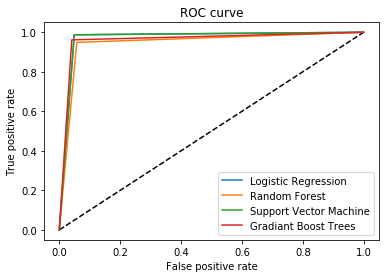

In [107]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lg, tpr_lg, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine')
plt.plot(fpr_grd, tpr_grd, label='Gradiant Boost Trees')
# plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

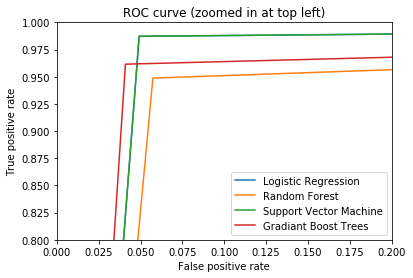

In [112]:
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lg, tpr_lg, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine')
plt.plot(fpr_grd, tpr_grd, label='Gradiant Boost Trees')
# plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()